<a href="https://colab.research.google.com/github/khiemtran99/Machine_Learning/blob/master/Copy_of_Inference_Statistics_with_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inference Statistics

Data scientists are often faced with yes-no questions about the world. Examples:

* Is chocolate good for you?
* Does coffee causes lung cancer?

Whether we answer questions like these depends on the data we have. Whether chocolate or any other treatment is good for you will almost certainly have to be decided by medical experts, but an initial step consists of using data science to analyze data from studies and randomized experiments. So we try to answer such yes-no questions, basing our conclusions on random samples and empirical distributions.

## Testing Hypotheses


### U.S. Supreme Court, 1965: Swain vs. Alabama

In the early 1960's, in Talladega County in Alabama, a black man called Robert Swain was convicted of raping a white woman and was sentenced to death. He appealed his sentence, citing among other factors the all-white jury. At the time, only men aged 21 or older were allowed to serve on juries in Talladega County. In the county, 26% of the eligible jurors were black, but there were only 8 black men among the 100 selected for the jury panel in Swain's trial. No black man was selected for the trial jury.

Jury panels are supposed to be selected at random from the eligible population. Because 26% of the eligible population was black, 8 black men on a panel of 100 might seem low.

The hypotheses here is that the panel was selected at random and ended up with a small number of black men just due to chance. This is called **the null hypothesis**. From a practical perspective, the null hypothesis is a hypothesis under which you can simulate data.

**The alternative hypothesis**. This says that some reason other than chance made the data differ from the predictions of the model in the null hypothesis.

In order to decide between the two hypothesis, we must choose a statistic that we can use to make the decision. This is called the **test statistic**.

Let's go through the process in detail.




#### The simulation

We can simulate data based on the model by drawing at random from a population of whom 26% are black. Our simulation will show what a panel would look like if it were selected at random. We can then compare the results of the simulation with the composition of Robert Swain's panel.

If the results of our simulation are not consistent with the composition of Swain's panel, that will be evidence against the model of random selection.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("whitegrid")

In [ ]:
probabilities = [0.26, 0.74]
sample_size = 100

def one_sample_count():
    """Return number of black men in one sample of 100 men"""
    return np.random.multinomial(sample_size, probabilities)[0]

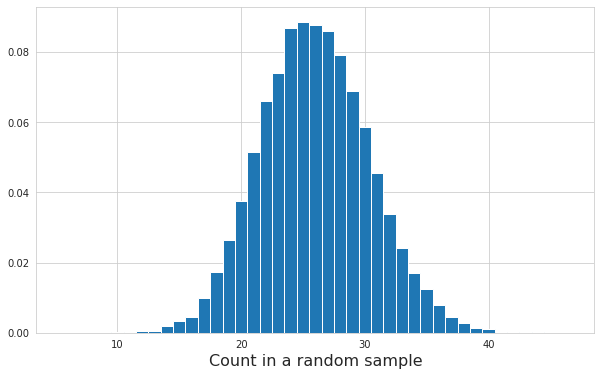

In [ ]:
counts = []

repetitions = 10000
for i in range(repetitions):
    counts.append(one_sample_count())

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=np.arange(5.5, 46.6, 1), density=True)
plt.xlabel('Count in a random sample', fontsize=16)
plt.show()

**Comparing the simulation and the data**

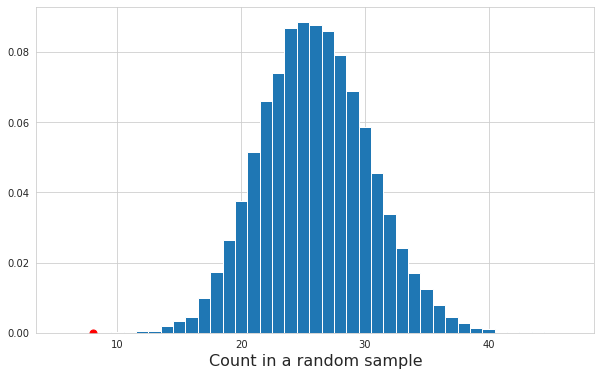

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=np.arange(5.5, 46.6, 1), density=True)
plt.scatter(8, 0, c='r', s=50)
plt.xlabel('Count in a random sample', fontsize=16)
plt.show()

The simulation shows that if we select a panel of 100 jurors at random from the eligible population, we are very unlikely to get counts of black men as low as the eight that were in Swain's jury panel. This is evidence that the model of random selection of the jurors in the panel is not consistent with the data from the panel.

If the data do not support the null hypothesis, we say that the test **rejects** the null hypothesis.

In [ ]:
counts = np.array(counts)
counts[counts <= 8]

array([], dtype=int64)

### The Instructor's Defense 

A Berkeley Statistics class of about 350 students was divided into 12 discussion sections led by Graduate Student Instructors (GSIs). After the midterm, students in Section 3 noticed that their scores were on average lower than the rest of the class.

In such situations, students tend to grumble about the section's GSI. Surely, they feel, there must have been something wrong with the GSI's teaching. Or else why would their section have done worse than others?

The GSI, typically more experienced about statistical variation, often has a different perspective: if you simply draw a section of students at random from the whole class, their average score could resemble the score that the students are unhappy about, just by chance.

The GSI's position is a clearly stated chance model. We can simulate data under this model. Let's test it out.

**Null Hypothesis**. The average score of the students in Section 3 is like the average score of the same number of students picked at random from the class.

**Alternative Hypothesis**. No, it's too low.

In [ ]:
scores = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/scores_by_section.csv')

The table scores contains the section number and midterm score for each student in the class. The midterm scores were integers in the range 0 through 25; 0 means that the student didn't take the test.

In [ ]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Section  359 non-null    int64
 1   Midterm  359 non-null    int64
dtypes: int64(2)
memory usage: 5.7 KB


In [ ]:
scores.describe()

,Section,Midterm
count,359.000000,359.000000
mean,6.434540,15.493036
std,3.475457,6.081323
min,1.000000,0.000000
25%,3.000000,11.000000
50%,6.000000,16.000000
75%,9.500000,20.000000
max,12.000000,25.000000


To find the average score in each section, we will use `groupby()`.



In [ ]:
scores.groupby('Section').mean()

,Midterm
Section,
1,15.593750
2,15.125000
3,13.666667
4,14.766667
5,17.454545
6,15.031250
7,16.625000
8,16.310345
9,14.566667


We also want to determine how many students are there in each section

In [ ]:
scores.groupby('Section').count()

,Midterm
Section,
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30


Section 3 has 27 students. Now we can simulate our test statistic. First we have to select 27 scores at random without replacement among the scores in the data. Then we can calculate the average score of that sample. And we repeat the process multiple times.

In [ ]:
def random_sample_average():
    """Return average score of a sample of 27 students"""
    return np.random.choice(scores['Midterm'], size=27, replace=False).mean()

In [ ]:
sample_averages = np.array([])

repetitions = 10000
for i in range(repetitions):
    sample_averages = np.append(sample_averages, random_sample_average())

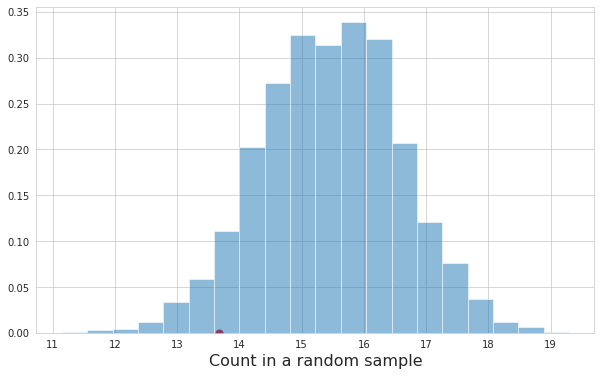

In [ ]:
observed_statistic = 13.667

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(sample_averages, bins=20, density=True, alpha=0.5)
plt.scatter(observed_statistic, 0, c='r', s=50)
plt.xlabel('Count in a random sample', fontsize=16)
plt.show()

Is the observed statistic of 13.667 "too low" in relation to this distribution? In other words, is the red far enough out into the left hand tail of the histogram for you to think that it is "too far"?

First we find how many percent of samples that are lower than the observed statistic:



In [ ]:
sample_averages[sample_averages < observed_statistic].shape[0] / repetitions

0.0553

About 5.7% of the simulated random sample averages were 13.667 or below. To evaluate this number, let's define some terminologies:

>**Definition**: 
>
>The **P-value** of a test is the chance, based on the model in the null hypothesis, that the test statistic will be equal to the observed value in the sample or even further in the direction that supports the alternative.

If a P-value is small, that means the tail beyond the observed statistic is small and so the observed statistic is far away from what the null predicts. This implies that the data support the alternative hypothesis better than they support the null.

How small is "small"? According to the conventions:

If the P-value is less than 5%, it is considered small and the result is called **"statistically significant."**

If the P-value is even smaller – less than 1% – the result is called **"highly statistically significant."**

By this convention, our P-value of 5.7% is not considered small. So we have to conclude that the GSI's defense holds good – the average score of Section 3 is like those generated by random chance. Formally, the result of the test is not statistically significant.

When you make a conclusion in this way, we recommend that you don't just say whether or not the result is statistically significant. Along with your conclusion, provide the observed statistic and the P-value as well, so that readers can use their own judgment.



## Comparing two samples

Often, data scientists have to compare two random samples with each other. For example, they might have to compare the outcomes of patients who have been assigned at random to a treatment group and a control group. Or they might have randomized internet users to receive two different versions of a website, after which they would want to compare the actions of the two random groups.

### A/B Testing

In modern data analytics, deciding whether two numerical samples come from the same underlying distribution is called A/B testing. The name refers to the labels of the two samples, A and B.

#### Smokers and Nonsmokers

The table births contains the following variables for 1,174 mother-baby pairs: the baby's birth weight in ounces, the number of gestational days, the mother's age in completed years, the mother's height in inches, pregnancy weight in pounds, and whether or not the mother smoked during pregnancy.

In [ ]:
births = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/baby.csv')

In [ ]:
births.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


In [ ]:
births[births['Maternal Age'] <= 16]

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
469,114,283,15,64,117,True


One of the aims of the study was to see whether maternal smoking was associated with birth weight. Let's see what we can say about the two variables.

False    715
True     459
Name: Maternal Smoker, dtype: int64


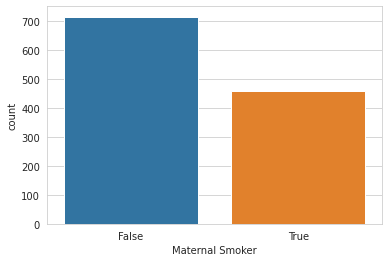

In [ ]:
print(births['Maternal Smoker'].value_counts())

sns.countplot(births['Maternal Smoker'])
plt.show()

Let's look at the distribution of the birth weights of the babies of the non-smoking mothers compared to those of the smoking mothers. To generate two overlaid histograms, we will use `hist` with the optional group argument which is a column label or index. The rows of the table are first grouped by this column and then a histogram is drawn for each one.

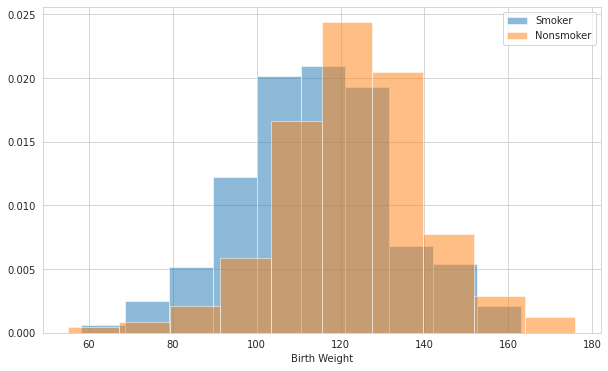

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(births[births['Maternal Smoker']==True]['Birth Weight'], label='Smoker', 
         alpha=0.5, bins=10, density=True)
plt.hist(births[births['Maternal Smoker']==False]['Birth Weight'], label='Nonsmoker', 
         alpha=0.5, bins=10, density=True)
plt.legend()
plt.xlabel('Birth Weight')
plt.show()

The distribution of the weights of the babies born to mothers who smoked appears to be based slightly to the left of the distribution corresponding to non-smoking mothers. The weights of the babies of the mothers who smoked seem lower on average than the weights of the babies of the non-smokers.

This raises the question of whether the difference reflects just chance variation or a difference in the distributions in the larger population. Could it be that there is no difference between the two distributions in the population, but we are seeing a difference in the samples just because of the mothers who happened to be selected?



We can try to answer this question by a test of hypotheses.

**Null hypothesis:** In the population, the distribution of birth weights of babies is the same for mothers who don't smoke as for mothers who do. The difference in the sample is due to chance.

**Alternative hypothesis:** In the population, the babies of the mothers who smoke have a lower birth weight, on average, than the babies of the non-smokers.

The alternative hypothesis compares the average birth weights of the two groups and says that the average for the mothers who smoke is smaller. Therefore it is reasonable for us to use the difference between the two group means as our statistic.

We will do the subtraction in the order "average weight of the smoking group minus average weight of the non-smoking group". Small values (that is, large negative values) of this statistic will favor the alternative hypothesis.



In [ ]:
mean_weights = births.groupby('Maternal Smoker')['Birth Weight'].mean()
mean_weights

Maternal Smoker
False    123.085315
True     113.819172
Name: Birth Weight, dtype: float64

In [ ]:
observed_difference = mean_weights[1] - mean_weights[0]
print('The observed value of the test statistic:', observed_difference)

The observed value of the test statistic: -9.266142572024918


**Predicting the Statistic Under the Null Hypothesis**

To see how the statistic should vary under the null hypothesis, we have to figure out how to simulate the statistic under that hypothesis. A clever method based on random permutations does just that.

If there were no difference between the two distributions in the underlying population, then whether a birth weight has the label True or False with respect to maternal smoking should make no difference to the average. The idea, then, is to shuffle all the labels randomly among the mothers. This is called random permutation.

Take the difference of the two new group means: the mean weight of the babies whose mothers have been randomly labeled smokers and the mean weight of the babies of the remaining mothers who have all been randomly labeled non-smokers. This is a simulated value of the test statistic under the null hypothesis.

In [ ]:
births['Shuffled Label'] = np.random.choice(births['Maternal Smoker'].to_numpy(), size=births.shape[0], replace=False)

In [ ]:
births[['Maternal Smoker', 'Birth Weight', 'Shuffled Label']].head()

,Maternal Smoker,Birth Weight,Shuffled Label
0,False,120,False
1,False,113,True
2,True,128,False
3,True,108,True
4,False,136,True


Each baby's mother now has a random smoker/non-smoker label in the column Shuffled Label, while her original label is in Maternal Smoker. If the null hypothesis is true, all the random re-arrangements of the labels should be equally likely.

Let's see how different the average weights are in the two randomly labeled groups.

In [ ]:
mean_shuffled = births.groupby('Shuffled Label')['Birth Weight'].mean()
mean_shuffled

In [ ]:
print('The different between the average weights in the two randomly labeled groups.:', 
      mean_shuffled[1]-mean_shuffled[0])

As always, we will define a function that simulates one value of the test statistic under the null hypothesis. This is just a matter of collecting the code that we wrote above. But because we will later want to use the same process for comparing means of other variables, we will define a function that takes three arguments:

* the name of the table of data
* the label of the column that contains the numerical variable
* the label of the column that contains the Boolean variable for grouping

It returns the difference between the means of two groups formed by randomly shuffling all the labels.

In [ ]:
def one_simulated_difference():
    """Return the difference between the means of two groups formed by randomly shuffling all the labels"""
    births['Shuffled Label'] = np.random.choice(births['Maternal Smoker'].to_numpy(), 
                                                size=births.shape[0], replace=False)
    mean_shuffled = births.groupby('Shuffled Label')['Birth Weight'].mean()
    return mean_shuffled[1]-mean_shuffled[0] 

**Permutation Test**

Tests based on random permutations of the data are called permutation tests. We are performing one in this example. In the cell below, we will simulate our test statistic – the difference between the averages of the two groups – many times and collect the differences in an array.

In [ ]:
differences = np.array([])

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference()
    differences = np.append(differences, new_difference)                               

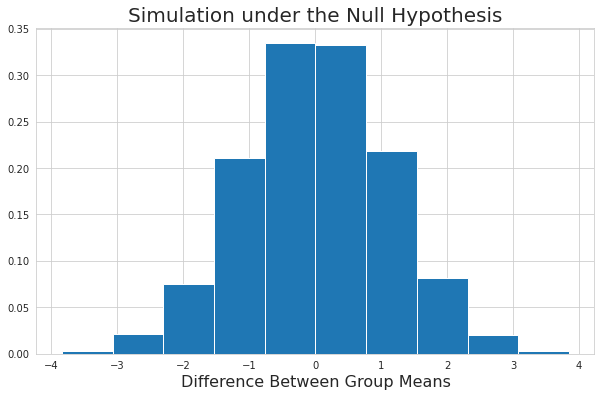

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.hist(differences, density=True)
plt.title('Simulation under the Null Hypothesis', fontsize=20)
plt.xlabel('Difference Between Group Means', fontsize=16)
plt.show()


In [ ]:
empirical_P = 100 * (differences <= observed_difference).sum() / repetitions 
print('P value:', empirical_P)

P value: 0.0


The empirical P-value is 0, meaning that none of the 5,000 permuted samples resulted in a difference of -9.27 or lower.

The conclusion of the test is that the data favor the alternative over the null. The average birth weight of babies born to mothers who smoke is less than the average birth weight of babies born to non-smokers.